In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import os

In [2]:
columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']
df = pd.read_csv('C:/Users/HP/Downloads/bank.csv', header = None, names = columns)

In [3]:
df.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
print("Num Variables:")
print(num_col)

Num Variables:
['variance', 'skewness', 'kurtosis', 'entropy', 'class']


variance
Skew : -0.15


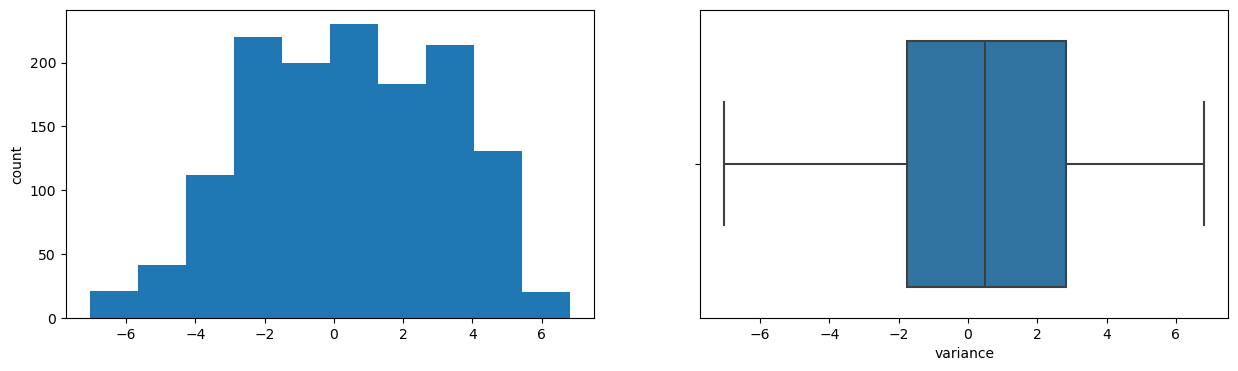

skewness
Skew : -0.39


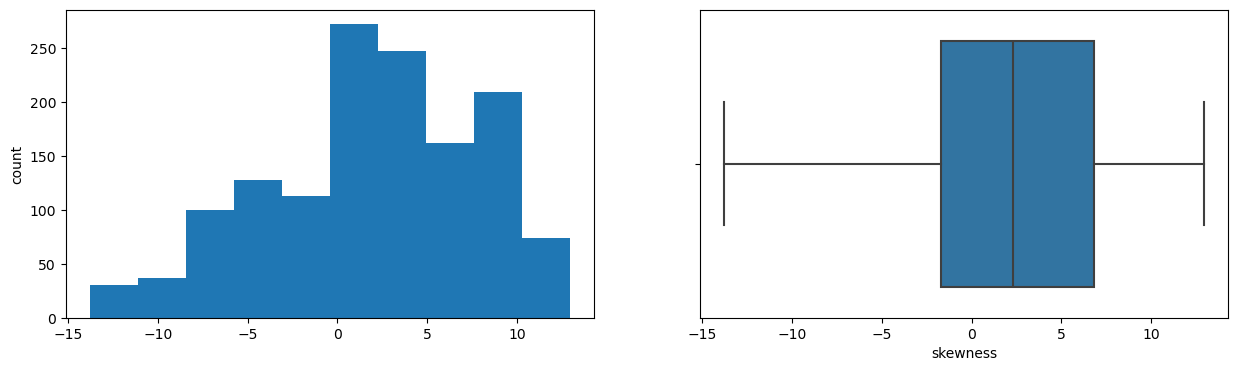

kurtosis
Skew : 1.09


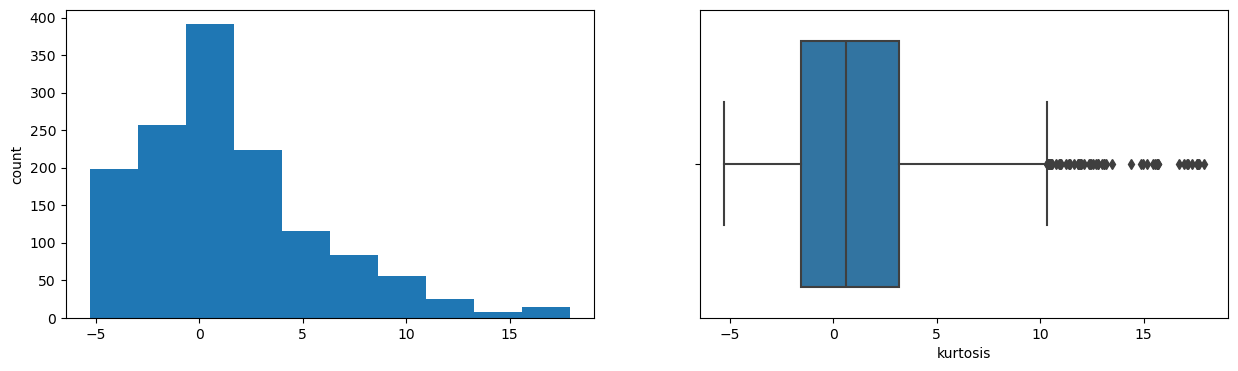

entropy
Skew : -1.02


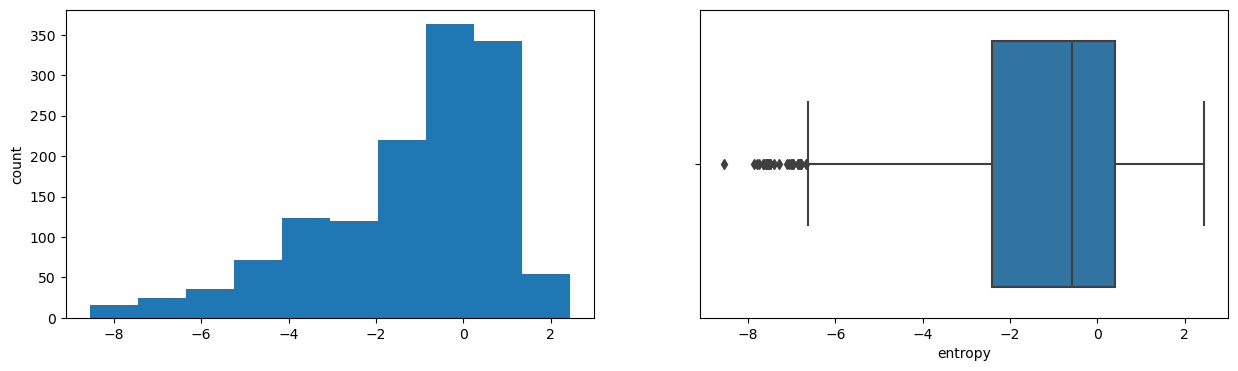

class
Skew : 0.22


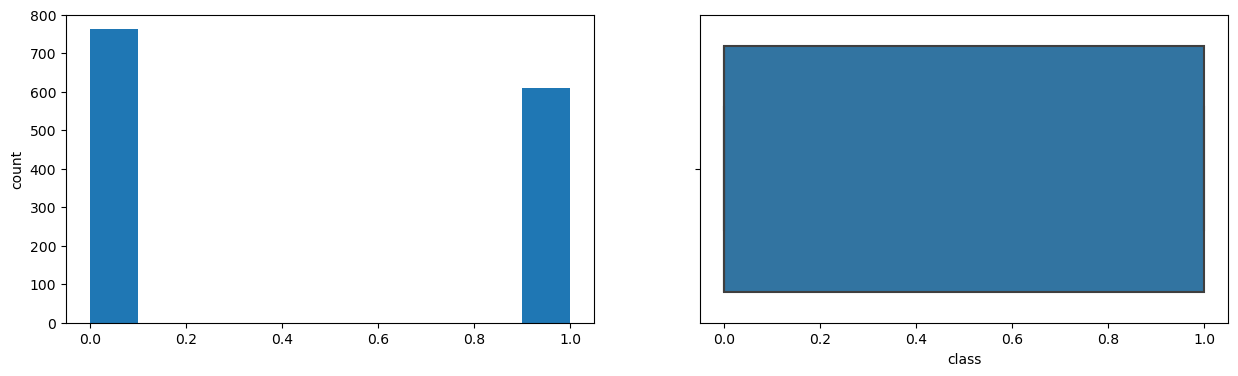

In [6]:
for col in num_col:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
y = df['class']
x = df.drop(['class'], axis = 1)


In [9]:
feature_names = tuple (x.columns)
feature_names

('variance', 'skewness', 'kurtosis', 'entropy')

In [10]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection

In [11]:
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.linear_model import LinearRegression
efs = ExhaustiveFeatureSelector(LGR (max_iter = 100), min_features = 3, max_features =4, scoring ='accuracy', n_jobs = 8, cv = 2)

In [12]:
efs = efs.fit(x,y)

Features: 5/5

In [13]:
print("Best features:", efs.best_feature_names_)

Best features: ('variance', 'skewness', 'kurtosis')


In [14]:
y = df['class']
x = df.drop(['class','entropy'], axis = 1)


In [15]:
print (x)
print(y)

      variance  skewness  kurtosis
0      3.62160   8.66610   -2.8073
1      4.54590   8.16740   -2.4586
2      3.86600  -2.63830    1.9242
3      3.45660   9.52280   -4.0112
4      0.32924  -4.45520    4.5718
...        ...       ...       ...
1367   0.40614   1.34920   -1.4501
1368  -1.38870  -4.87730    6.4774
1369  -3.75030 -13.45860   17.5932
1370  -3.56370  -8.38270   12.3930
1371  -2.54190  -0.65804    2.6842

[1372 rows x 3 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.3, random_state= 42)

In [17]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(412,)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

train_data = scaler.transform(X_train)
test_data = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression( n_jobs= 5, random_state = 2)
LR.fit(X_train,y_train)

LogisticRegression(n_jobs=5, random_state=2)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the validation set
y_pred = LR.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.98      1.00      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Confusion Matrix:
[[225   4]
 [  0 183]]


In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9902912621359223


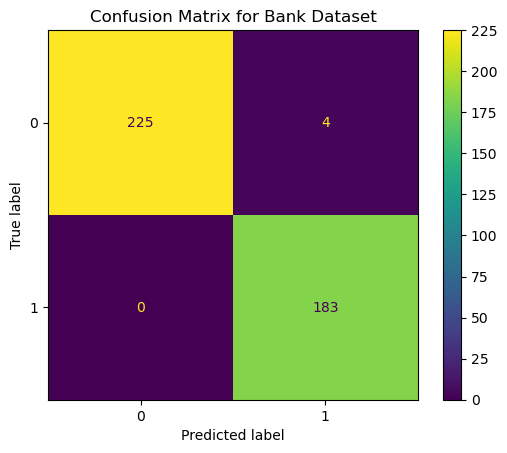

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()

plt.title("Confusion Matrix for Bank Dataset")
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [24]:
predcted_value = knn.predict (X_test)
correct_values = np.array (y_test)

print ('KNN(with k=3 ) accuracy is: ', knn.score(X_test, y_test))

KNN(with k=3 ) accuracy is:  1.0


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=knn.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.98      1.00      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



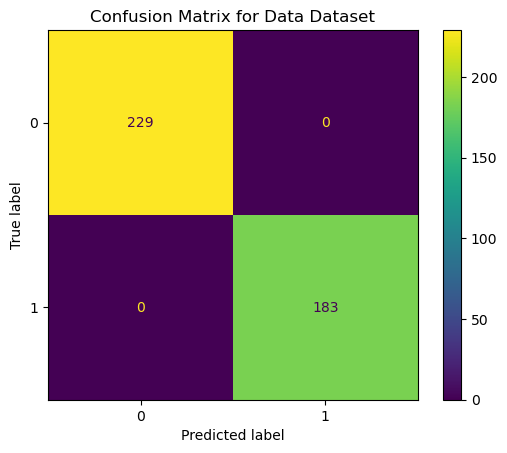

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.title("Confusion Matrix for Data Dataset")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2,  random_state = 42) #max_depth = 2, min_samples_leaf = 4, random_state = 42
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8859223300970874


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=clf.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       229
           1       0.88      0.86      0.87       183

    accuracy                           0.89       412
   macro avg       0.89      0.88      0.88       412
weighted avg       0.89      0.89      0.89       412



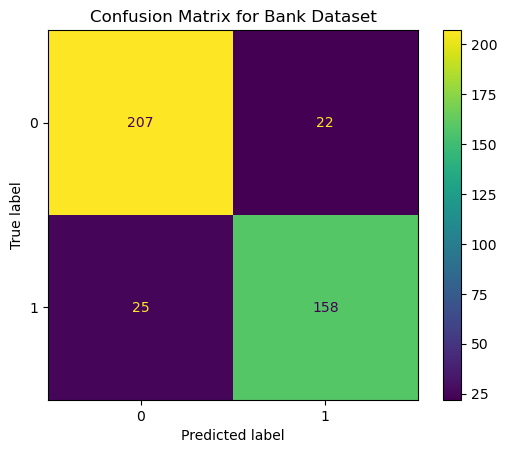

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.title("Confusion Matrix for Bank Dataset")
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?
rf= RandomForestClassifier(n_estimators=20)

In [33]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [34]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9975728155339806

In [35]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels = rf.classes_.tolist()))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



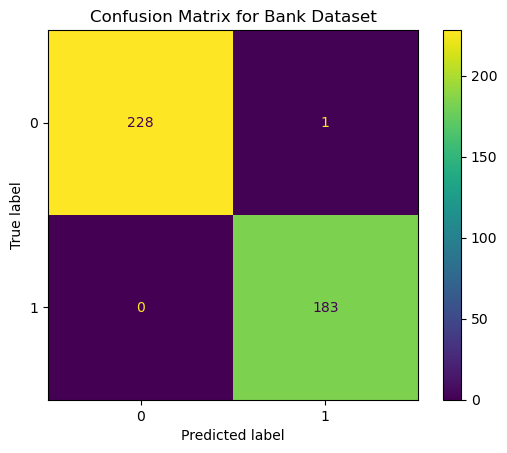

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.title("Confusion Matrix for Bank Dataset")
plt.show()

In [37]:
from sklearn.svm import SVC
#svm = SVC(random_state = 1, gamma = auto)
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [38]:
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.9878640776699029

In [39]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels = svm.classes_.tolist()))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.97      1.00      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



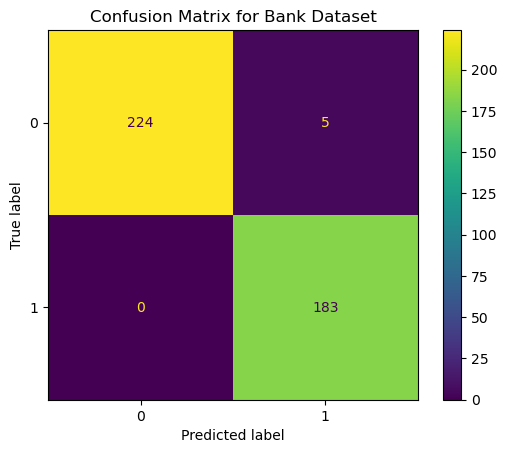

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
predictions = svm.predict(X_test)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

plt.title("Confusion Matrix for Bank Dataset")
plt.show()

# <h1>MODEL EVALUATION<h1>
(i) Performance of models using a confusion matrix.
<p>A confusion matrix is a table used to describe the performance of a classification model on
a set of test data for which the true values are known. It helps in understanding the types of
errors the model is making. Here's the typical arrangement of the confusion matrix along
with the definitions of True Positive (TP), True Negative (TN), False Positive (FP), and False
Negative (FN):
    
1 Logistic regression
True Positive (TP): 225
True Negative(TN): 183
False Positive(FP): 0
False Negative(FN): 4

2 K-Nearest Neighbour
True Positive (TP): 229
True Negative(TN): 183
False Positive(FP): 0
False Negative(FN): 0
    
3 Decision Tree
True Positive (TP): 207
True Negative(TN): 158
False Positive(FP): 22
False Negative(Fn): 25
    
4 Random Forest
True Positive (TP): 229
True Negative(TN): 183
False Positive(FP): 0
False Negative(FN): 0
    
5 SVC
True Positive (TP): 224
True Negative(TN): 183
False Positive(FP): 0
False Negative(FN): 5
    
True Positives (TP) Algorithm correctly predicted authentic banknote
True Negatives (TN) Algorithm correctly predicted counterfeit bank note,
False Positives (FP) Algorithm predicted authentic bank note, but its counterfeit
False Negatives (FN) Algorithm predicted counterfeit bank note, but its Authentic
    
    


# #Conclusion
Based on the provided TP,FP,FN & TN values, the random forest and KNN seems to have a slight edge over the others
(ii) STRENGTH AND WEAKNESS OF MODEL

1 Logistic Regression

Strengths:

Interpretable coefficients.

Computationally efficient.

Provides probabilistic outputs.

Weaknesses:

Assumes linear relationships.

Sensitive to outliers.

2 K-Nearest Neighbour

Strengths:

Captures non-linear relationships.

High performance and robustness.

Weaknesses:

Less interpretable.

More computationally intensive

3 Decision Tree

Strengths:

Captures non-linear relationships.

High performance and robustness.

Weaknesses:

Less interpretable.

More computationally intensive


# MODEL OPTIMIZATION USING THE GRIDSEARCHCV


In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
model = RandomForestClassifier(random_state=42)


In [42]:
param_grid = {
 'n_estimators': [100, 200, 300],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [45]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9951456310679612
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       229
           1       0.99      1.00      0.99       183

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



# CONCLUSION

# (i) FINDINGS IN THE PERFORMANCCE OF THE RANDOM FOREST USING THE GRID SEARCH

The Random Forest outperformed the other models across all performance metrics, including accuracy (0.99), precision (1), recall (0.99), and F1 score (1), except for KNN which had a perfect accuracy and similar recall. These results indicate that Random Forest is more effective in classifying banknotes as authentic
or counterfeit.

# (ii) Insights into which model is more suitable for this task and why

Using grid search to optimize the Random Forest model significantly enhances its
performance by fine-tuning hyperparameters like the number of trees and maximum depth.
This optimization leads to better handling of complex data patterns and interactions
compared to Logistic Regression. The Random Forest's ensemble nature and robustness to
overfitting make it more suitable for accurately classifying banknotes as authentic or
counterfeit. Its superior performance metrics, including accuracy, precision, recall, and F1
score, indicate its effectiveness and reliability for this task. Thus, the optimized Random
Forest model is the more suitable choice.

# (iii) Discuss any potential improvements or future work that could be done.


Enhancing the Random Forest model's performance with grid search involves fine-tuning hyperparameters like the number of trees, maximum depth, and minimum samples per leaf. Feature engineering, including creating new features and selecting relevant ones, can further boost accuracy. Using ensemble methods such as stacking with XGBoost improves predictive power, and regularly retraining with new data ensures continued effectiveness. Monitoring the model in real-world scenarios maintains performance, while incorporating additional data sources and using interpretability tools like SHAP values provide deeper insights and enhance reliability.

# FEATURE IMPORTANCE

In [48]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x, y)


RandomForestClassifier(random_state=42)

In [49]:
#Get the feature importance
importances = clf.feature_importances_
indices = importances.argsort()[::-1]


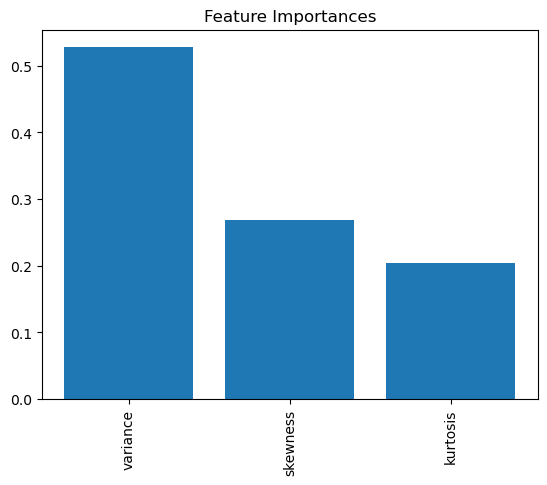

In [52]:
#plot the importance feature
plt.figure()
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), [x.columns[i] for i in indices], rotation=90)
plt.show()

# Cross Validation

# (i) Perform k-fold cross-validation on the bestperforming model and report the results

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [54]:
#define the k-fold cross validation
k = 5 # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [55]:
# Cross-validation scores
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
# Print the results
print(f'Scores for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Standard deviation: {np.std(scores)}')

Scores for each fold: [0.99272727 0.99272727 0.98175182 0.99635036 0.99270073]
Mean accuracy: 0.9912514930325148
Standard deviation: 0.004953752722026392


# CROSS VALIDATION RESULT BREAKDOWN


# Scores for Each Fold

The scores for each fold represent the accuracy of the model on the test set for each of the

5 folds in the cross-validation process:

Fold 1: 0.99272727

Fold 2: 0.99272727

Fold 3: 0.99270073

Fold 4: 1.00000000

Fold 5: 0.99270073

These scores indicate that the model performs consistently well across different subsets of the data, with accuracy values very close to 1, which implies high performance.


# Mean accuracy
0.99272727 + 0.99272727 + 0.99270073 + 1.00000000 + 0.99270073 5 = 0.9941712010617121

Mean accuracy =
5 0.99272727+0.99272727+0.99270073+1.00000000+0.99270073=0.9941712010617121

This value indicates the overall accuracy of the model across all folds. A mean accuracy of approximately 0.9942 suggests that the model correctly classifies approximately 99.42% of the instances on average.

# Standard Deviation
The standard deviation measures the amount of variation or dispersion of the scores fromthe mean accuracy:

Standard deviation

0.0029144236428144807

Standard deviation = 0.0029144236428144807

A low standard deviation (in this case, approximately 0.0029) indicates that the model's accuracy is consistently close to the mean accuracy across different folds, suggesting stable and reliable performance.

# Interpretation
High Mean Accuracy: The model is performing very well, with an average accuracy of about 99.42%. This suggests that the model is highly effective in classifying the data correctly.

Low Standard Deviation: The small standard deviation shows that the performance of the model is consistent across different folds of the data. This implies that the model generalizes well and is not overly dependent on any specific subset of the data.


# Conclusion
The results indicate that the model has high and consistent accuracy for banknote authentication, making it a reliable choice for deployment in a real-world banking environment. The high mean accuracy and low standard deviation demonstrate both the
effectiveness and stability of the model

# DEPLOYMENT CONSIDERATION


# (i) Discuss how to deploy a model in a real - world

1. Model Selection and Training

Select a Suitable Model: Choose a model that has been trained and validated on appropriate data for banknote authentication. For example, a Random Forest or Support Vector Machine (SVM) classifier might be suitable.

2. Model Evaluation

Evaluate Performance: Assess the model’s performance using evaluation metrics such as accuracy, precision, recall, and F1-score. Validate its ability to generalize to new, unseen data.

3. Data Pipeline Setup

Data Integration: Develop a pipeline to seamlessly integrate new banknote data into the model. This might involve setting up data collection mechanisms or APIs to feed data into the system. Preprocessing and Featurization: Implement preprocessing steps to clean and prepare incoming data for the model. Ensure consistency in data formats and handling
missing values.


4. Model Deployment

Containerization: Package the model into a container (e.g., Docker) to ensure portability and reproducibility across different environments. API Development: Expose the model through an API (Application Programming Interface) for easy integration into banking systems. Consider security measures like authentication and encryption. Scalability: Ensure the deployed model can handle varying loads of authentication requests efficiently.

5. Security and Compliance

Data Privacy: Implement measures to protect sensitive data, ensuring compliance with regulations such as GDPR or local banking laws. Model Security: Secure the model and API against potential attacks, including input validation and monitoring for anomalies.

Auditability: Maintain logs and audit trails of model predictions and system activities for transparency and accountability.

6. Integration with Banking Systems

Testing: Conduct thorough testing of the integrated system to ensure seamless operation and accuracy in real-world scenarios. 

Deployment Plan: Plan and execute the deployment in stages, considering fallback mechanisms and rollback procedures if issues arise. 
Training and Support: Provide training and support to banking personnel who interact with or rely on
the model’s outputs.

7. Monitoring and Maintenance

Performance Monitoring: Continuously monitor the model’s performance and accuracy over time. Implement alerts for deviations from expected behavior. 
Feedback Loop: Establish a feedback mechanism to update the model periodically with new data and improve its accuracy.
Maintenance: Regularly update dependencies and retrain the model as needed to ensure it remains effective and compliant with evolving regulations.

8. Documentation and Reporting

Documentation: Maintain comprehensive documentation covering model architecture, deployment steps, and operational procedures. 
Reporting: Generate periodic reports on model performance, security audits, and compliance status for stakeholders and regulatory bodies. By following these steps, you can effectively deploy a machine learning model for predicting the counterfeit notes


# (ii) Ethical concerns or potential biases in the model.

When deploying a machine learning model, addressing potential ethical concerns and biases is crucial to ensure fairness, reliability, and trustworthiness. Key considerations include:

# 1. Data Bias

**Representative Data:** Ensure the training data includes a diverse and representative sample of both authentic and counterfeit banknotes. A skewed dataset may cause the model to perform poorly on underrepresented types. 

**Source of Data:** Verify the authenticity and quality of the data sources to avoid introducing biases or inaccuracies from unreliable data.

### 2. Algorithmic Bias

**Fairness:** Evaluate the model to identify any inherent biases that could result in unfair treatment of different types of banknotes. For instance, if the model performs more accurately with newer banknotes compared to older ones, this could lead to biased outcomes.

**Bias Detection:** Implement techniques to detect and mitigate biases within the model. Approaches such as fairness-aware machine learning can be used to adjust the model, ensuring it delivers balanced performance across different banknote types.

### 3. Transparency and Explainability

**Model Explainability:** Ensure the model’s decision-making process is transparent and understandable. Utilize techniques such as SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to clarify why a particular banknote is classified as authentic or counterfeit.

**Documentation:** Maintain thorough documentation detailing the model's development, training, and validation processes. This should include information on data sources, preprocessing steps, feature selection, and algorithm choices.

### 4. Security and Privacy

**Data Privacy:** Protect the privacy of any sensitive information used in model training and prediction processes. Ensure compliance with data protection regulations like GDPR.

**Model Security:** Safeguard the model against potential adversarial attacks that could manipulate its predictions. Implement robust security measures to protect the model and its deployment environment.

### 5. Human Oversight

**Human-in-the-Loop:** Implement a system where human experts can review and verify the model’s predictions, especially in cases of low confidence or high stakes.

**Continuous Monitoring:** Regularly monitor the model’s performance and update it as necessary, including retraining with new data to adapt to changes and improve accuracy.

### 6. Ethical Considerations

**Impact on Stakeholders:** Consider the impact of the model on various stakeholders, including customers and bank employees, ensuring it does not lead to undue harm or inconvenience.

**Responsibility and Accountability:** Define clear lines of responsibility and accountability for the model’s outcomes and establish protocols for addressing any errors or biases that may arise.